# Data driven building simulation

In this learning-machine code, we are using data taken from paper: "On-line learning of indoor temperature forecasting models towards energy efficiency".
This dataset is collected from a monitor system settled in a domotic house near Valencia, built by Cardinal Herrera University. It corresponds to approximately 40 days of monitoring data, which are sampled every 15 minutes.
The first aim of the project is to investigate the correlation between outside and inside parameters. Then we proceed with the building of a model in order to predict the indoor temperature variation as a function of all the other data which are related to it.

In [3]:
#importing dataset 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DataFolderPath = "C:\Users\giugi\Dropbox\Building systems group project\Project\DataDriven"
FileName= "NEW-DATA-1.T15.txt"
FilePath = DataFolderPath+"\\"+FileName

# combining first and second columns to create a unique index column (date+time)
DataFrame = pd.read_csv(FilePath, sep= " ", index_col=6)
DataFrame["period"] = DataFrame["1:Date"].map(str) + " " + DataFrame["2:Time"].map(str)
DataFrame.index = DataFrame["period"]

In [4]:
# convert indexes from dtype 'object' to 'datetime'
previousIndex = DataFrame.index 
ParsedIndex = pd.to_datetime(previousIndex)
DataFrame.index = ParsedIndex

In [5]:
# selecting a specific time interval and removing the NaNs
DF_myChosenDates = DataFrame["2012-03-20 12:00:00 ":"2012-03-23 12:00:00 "]
DF_cleaned = DF_myChosenDates.dropna()

In [6]:
# looking for a correlation among data 
DF_cleaned.corr()

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,12:Precipitacion,13:Meteo_Exterior_Crepusculo,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
3:Temperature_Comedor_Sensor,1.000000,0.991750,0.738386,0.697682,0.352276,-0.201960,0.203087,0.120177,-0.319768,0.130975,...,0.496972,-0.190735,0.157812,0.248869,NaN,NaN,NaN,0.885960,-0.693552,0.328668
4:Temperature_Habitacion_Sensor,0.991750,1.000000,0.772518,0.730511,0.329334,-0.192619,0.272777,0.179446,-0.299455,0.170408,...,0.533660,-0.197513,0.215976,0.313047,NaN,NaN,NaN,0.912772,-0.661631,0.275542
5:Weather_Temperature,0.738386,0.772518,1.000000,0.590256,0.094413,-0.197850,0.637744,0.580487,-0.159738,0.415530,...,0.553761,0.052539,0.587032,0.657693,NaN,NaN,NaN,0.924586,-0.491271,0.043823
6:CO2_Comedor_Sensor,0.697682,0.730511,0.590256,1.000000,0.424924,0.081113,0.433529,0.354848,-0.529536,0.308183,...,0.662112,0.038009,0.422184,0.515601,NaN,NaN,NaN,0.755949,-0.553412,0.342202
8:Humedad_Comedor_Sensor,0.352276,0.329334,0.094413,0.424924,1.000000,0.644086,-0.031951,-0.007426,-0.765073,-0.112723,...,0.035241,0.093447,0.019114,0.005361,NaN,NaN,NaN,0.278896,-0.330180,0.445719
9:Humedad_Habitacion_Sensor,-0.201960,-0.192619,-0.197850,0.081113,0.644086,1.000000,-0.177236,-0.175222,-0.473744,-0.261758,...,-0.102857,-0.094465,-0.168137,-0.167205,NaN,NaN,NaN,-0.125370,0.389492,-0.095753
10:Lighting_Comedor_Sensor,0.203087,0.272777,0.637744,0.433529,-0.031951,-0.177236,1.000000,0.958805,-0.222386,0.616067,...,0.418389,0.402148,0.950155,0.959486,NaN,NaN,NaN,0.532368,-0.338371,0.173256
11:Lighting_Habitacion_Sensor,0.120177,0.179446,0.580487,0.354848,-0.007426,-0.175222,0.958805,1.000000,-0.234285,0.599654,...,0.309928,0.548663,0.974723,0.941709,NaN,NaN,NaN,0.441651,-0.335234,0.233873
12:Precipitacion,-0.319768,-0.299455,-0.159738,-0.529536,-0.765073,-0.473744,-0.222386,-0.234285,1.000000,-0.038282,...,-0.216520,-0.217957,-0.277528,-0.275680,NaN,NaN,NaN,-0.345110,0.501221,-0.702339
13:Meteo_Exterior_Crepusculo,0.130975,0.170408,0.415530,0.308183,-0.112723,-0.261758,0.616067,0.599654,-0.038282,1.000000,...,0.499403,0.516618,0.627136,0.667412,NaN,NaN,NaN,0.374037,-0.235143,0.016845


Analyzing the data, we decide to futher investigate the correlation among indoor temperature, outdoor temperature, solar irradiance (measured by a piranometer) and inside lighting

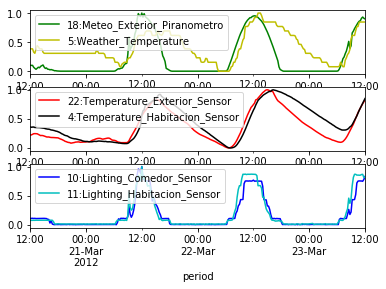

In [7]:
# building a normalized dataframe and adding subplots in order to show the correlation graphically 
Normalized_DF=DF_cleaned.copy()

# removing not correlated columns
Normalized_DF.drop(Normalized_DF.columns[[0,1,10,11,12,13,14,15,17,18,19,22,23]],axis=1,inplace=True) 

# normalizing
Max = Normalized_DF.max() 
Min = Normalized_DF.min()
Normalized_DF= (Normalized_DF-Min)/(Max-Min)

fig = plt.figure()
ax1= fig.add_subplot(3,1,1) 
ax2= fig.add_subplot(3,1,2)
ax3= fig.add_subplot(3,1,3)

Normalized_DF["18:Meteo_Exterior_Piranometro"].plot(ax=ax1,color= "g", legend= True)
Normalized_DF["5:Weather_Temperature"].plot(ax=ax1,color= "y", legend= True)
Normalized_DF["22:Temperature_Exterior_Sensor"].plot(ax=ax2,color= "r", legend= True)
Normalized_DF["4:Temperature_Habitacion_Sensor"].plot(ax=ax2,color= "k", legend= True)
Normalized_DF["10:Lighting_Comedor_Sensor"].plot(ax=ax3,color= "b", legend= True)
Normalized_DF["11:Lighting_Habitacion_Sensor"].plot(ax=ax3,color= "c", legend= True)
plt.show()


From this graph we can observe that there is a delay between solar irradiance and both temperatures

In [8]:
# defining a function which calculates the lag, generate columns with a delay of time and save them in a new dataframe
DF_FinalDataSet= DF_cleaned.copy()

def lag_column(df,column_name,lag_period=1):
    for i in range(1,lag_period+1,1):
        new_column_name= column_name+"-"+str(i)+"hr"
        df[new_column_name]= df[column_name].shift(i)
  
    return df

DF_FinalDataSet= lag_column(DF_FinalDataSet,"4:Temperature_Habitacion_Sensor",24)
DF_FinalDataSet.dropna(inplace=True)

We apply the shift to the indoor temperature, because it is the parameter which presents a delay w.r.t. the solar irradiance 

In [9]:
# removing the columns which we do not include in the model 
DF_FinalDataSet.drop(DF_FinalDataSet.columns[[0,1,6,8,9,10,11,12,13,14,15,17,18,19,23]],axis=1,inplace=True);
DF_FinalDataSet.dropna(inplace=True)    
DF_FinalDataSet.corr()

# splitting the data in two different dataframe
# DF_target contains the parameter that we want to predict, DF_features is the original dataframe without the target column 
DF_target = DF_FinalDataSet["4:Temperature_Habitacion_Sensor"]
DF_features = DF_FinalDataSet.drop("4:Temperature_Habitacion_Sensor", axis = 1)

# now that we have input(features) and output(target) we can build the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(DF_features,DF_target,test_size=0.2,random_state=41234)

The test_size represents the percentage of data used for testing, in our case 20% for testing while 80% for checking

In [10]:
# testing the model
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

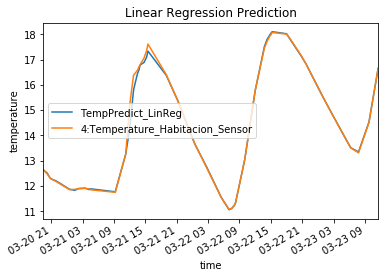

In [11]:
# defining the linear model with training data (20%)
linear_reg.fit(X_train,Y_train)

# testing the plot with the other checking data (80%)
predict_linearReg_split = linear_reg.predict(X_test)

#collecting them in a dataframe
Y_test.index
predict_DF_linearReg_split = pd.DataFrame(predict_linearReg_split,index = Y_test.index,columns = ["TempPredict_LinReg"])
predict_DF_linearReg_split = predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split_ChosenDates = predict_DF_linearReg_split["2012-03-20":"2012-03-23"]

predict_DF_linearReg_split_ChosenDates.plot()
plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Linear Regression Prediction")
plt.show()

In [12]:
# finding the metrics related to linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_split = mean_absolute_error(Y_test,predict_linearReg_split)
mean_squared_error_linearReg_split = mean_squared_error(Y_test,predict_linearReg_split)
R2_score_linearReg_split = r2_score(Y_test,predict_linearReg_split)

print 'Coefficient of determination (R-squared) = '+str(R2_score_linearReg_split)

Coefficient of determination (R-squared) = 0.995017871285


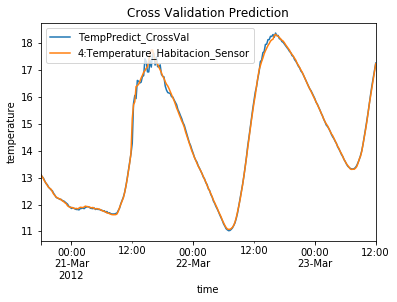

In [13]:
# using another method called cross validation
from sklearn.model_selection import cross_val_predict
predict_linearReg_CV = cross_val_predict(linear_reg,DF_features,DF_target,cv=10)
predict_DF_linearReg_CV = pd.DataFrame(predict_linearReg_CV,index = DF_target.index,columns = ["TempPredict_CrossVal"])
predict_DF_linearReg_CV = predict_DF_linearReg_CV.join(DF_target)
predict_DF_linearReg_CV_ChosenDates = predict_DF_linearReg_CV["2012-03-20 12:00:00 ":"2012-03-23 12:00:00"]
predict_DF_linearReg_CV_ChosenDates.plot()
plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Cross Validation Prediction")
plt.show(1)


In [14]:
# finding the metrics related to cross validation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_CV = mean_absolute_error(DF_target,predict_linearReg_CV)
mean_squared_error_linearReg_CV = mean_squared_error(DF_target,predict_linearReg_CV)
R2_score_linearReg_CV = r2_score(DF_target,predict_linearReg_CV)
print 'Coefficient of determination (R-squared) = '+str(R2_score_linearReg_CV)

Coefficient of determination (R-squared) = 0.997666834876


# Conclusion
We can point out that both models turn to be a good approximation of the actual values behaviour. In particular, the cross validation is the model which reaches higher R-Squared showing to be the best fit.